# Autenticação
Primeiro precisamos autenticar nossa sessão do Colab no Google e definimos o ID do projeto

In [0]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [0]:
#Informe o id do projeto nesta linha. Este é meu ID, você precisa colocar o teu:

project_id = "workshop-5ia-tensorflow-253922" #@param {type:"string"}


# Client Big Query

Como vamos buscar dados no bigquery, é necessário criar um cliente BG

In [0]:
# Call BigQuery and examine in dataframe
from google.cloud import bigquery

bgclient = bigquery.Client(project=project_id)

Demais imports:

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np

#Exploração



Vamos avaliar quantas observações realmente temos, e quanta temos a partir de 2001

In [0]:
query = """
SELECT
  COUNT(1) as observacoes
FROM
  publicdata.samples.natality
"""
df = bgclient.query(query).to_dataframe()
df

,observacoes
0,137826763


In [0]:
query = """
SELECT
  COUNT(1) as observacoes
FROM
  publicdata.samples.natality
WHERE year > 2000
"""
df = bgclient.query(query).to_dataframe()
df

,observacoes
0,33271914


Então iniciamos a exploração detalhada. Vamos buscar apenas 1000 observações dos nascimentos a partir de 2001:

In [0]:
query = """
SELECT
  weight_pounds,
  weight_pounds * 0.45359237 AS weight_kilos,
  is_male,
  mother_age,
  mother_married,
  plurality,
  gestation_weeks,
  CONCAT(CAST(YEAR AS STRING), CAST(month AS STRING)) as year_and_month,
  FARM_FINGERPRINT('DUAN') AS MeuHash,  
  ABS(FARM_FINGERPRINT(CONCAT(CAST(YEAR AS STRING), CAST(month AS STRING)))) AS hashmonth,
  RAND() AS meurand
FROM
  publicdata.samples.natality
WHERE year > 2000
LIMIT 1000
"""

In [0]:
df = bgclient.query(query).to_dataframe()
df.head()

,weight_pounds,weight_kilos,is_male,mother_age,mother_married,plurality,gestation_weeks,year_and_month,MeuHash,hashmonth,meurand
0,7.063611,3.204,True,32,True,1,37.0,200112,-8852426674457033647,7108882242435606404,0.920699
1,4.687028,2.126,True,30,True,3,33.0,20016,-8852426674457033647,7170969733900686954,0.483441
2,7.561856,3.430,True,20,False,1,39.0,20014,-8852426674457033647,6392072535155213407,0.221445
3,7.561856,3.430,True,31,True,1,37.0,200110,-8852426674457033647,2126480030009879160,0.304522
4,7.312733,3.317,True,32,True,1,40.0,200111,-8852426674457033647,3408502330831153141,0.197682


# Análise bi-variada.

Observando peso e quantidade a partir de diversas dimensões

In [0]:
# Para facilitar nossa vida,  
def get_grouped_values(column_name):
  sql = """
SELECT
  {0},
  COUNT(1) AS qtde_bebes,
  AVG(weight_pounds * 0.45359237) AS peso_medio
FROM
  publicdata.samples.natality
WHERE
  year > 2000
GROUP BY
  {0}
ORDER BY
  {0}
  """.format(column_name)
  return bgclient.query(sql).to_dataframe()

A partir de então, plote e analise a quantidade de bebês nascidos e seu peso médio por cada um dos atributos pedidos pelo professor:


,0,1
is_male,False,True
qtde_bebes,16245054,17026860
peso_medio,3.22264,3.33381


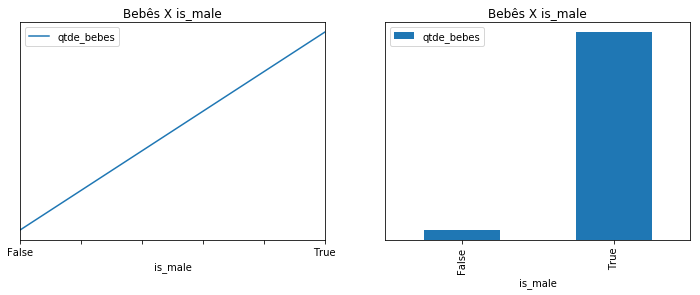

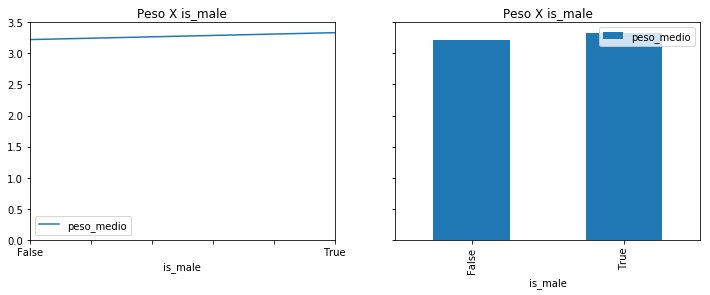

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
mother_age,10.000,11.000000,12.000000,13.000000,14.000000,15.000000,16.0000,17.00000,18.000000,1.900000e+01,2.000000e+01,2.100000e+01,2.200000e+01,2.300000e+01,2.400000e+01,2.500000e+01,2.600000e+01,2.700000e+01,2.800000e+01,2.900000e+01,3.000000e+01,3.100000e+01,3.200000e+01,3.300000e+01,3.400000e+01,3.500000e+01,36.000000,37.000000,38.000000,39.000000,40.000000,41.000000,42.000000,43.00000,44.000000,45.000000,46.000000,47.000000,48.00000,49.000000,50.000000,51.00000,52.000000,53.000000,54.000000
qtde_bebes,3.000,44.000000,1196.000000,7552.000000,44868.000000,147763.000000,341199.0000,613485.00000,973333.000000,1.359770e+06,1.541714e+06,1.625899e+06,1.709756e+06,1.734553e+06,1.764889e+06,1.796215e+06,1.814332e+06,1.819337e+06,1.815141e+06,1.798871e+06,1.754406e+06,1.679501e+06,1.557453e+06,1.411231e+06,1.266968e+06,1.106436e+06,930797.000000,750945.000000,588075.000000,449310.000000,324766.000000,220334.000000,140562.000000,83821.00000,46245.000000,24256.000000,12131.000000,6266.000000,3357.00000,1948.000000,2723.000000,225.00000,98.000000,83.000000,57.000000
peso_medio,3.417,2.789568,2.951221,3.019139,3.058883,3.103023,3.1281,3.14927,3.163093,3.186925e+00,3.205740e+00,3.221282e+00,3.240641e+00,3.257376e+00,3.271632e+00,3.286059e+00,3.298048e+00,3.307840e+00,3.314668e+00,3.322937e+00,3.327285e+00,3.330284e+00,3.332487e+00,3.332401e+00,3.331603e+00,3.324768e+00,3.318205,3.310843,3.300696,3.294292,3.281977,3.272784,3.256367,3.23683,3.197294,3.140008,3.060944,2.985536,2.89039,2.842592,2.798402,2.70975,2.855071,2.723537,2.898719


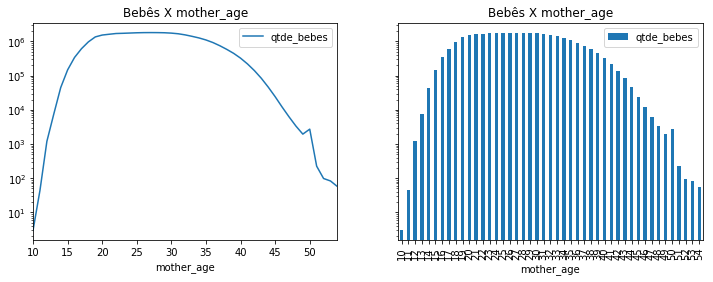

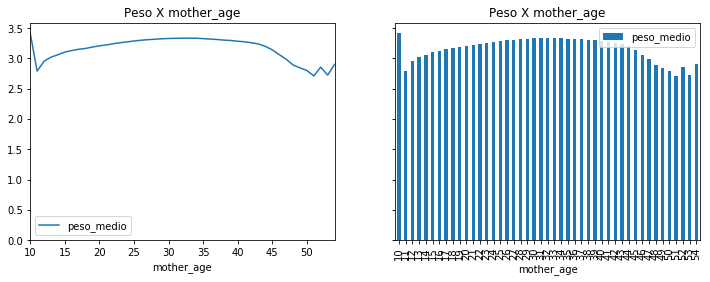

,0,1,2,3,4
plurality,1.000000e+00,2.000000e+00,3.000000,4.000000,5.000000
qtde_bebes,3.215976e+07,1.056305e+06,51913.000000,3337.000000,597.000000
peso_medio,3.313340e+00,2.333672e+00,1.673049,1.292039,1.140809


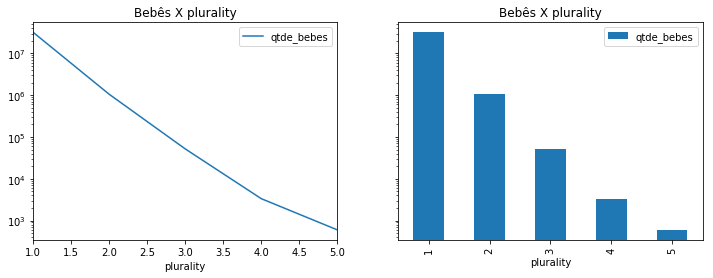

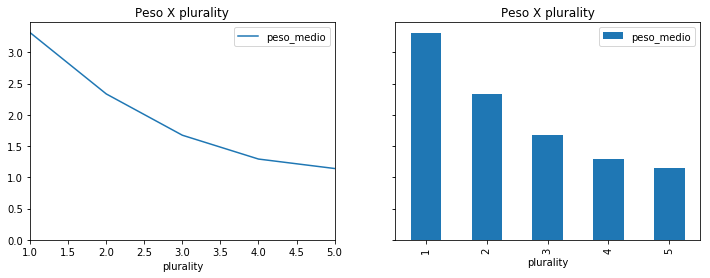

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,0
gestation_weeks,17.000000,18.000000,19.000000,20.000000,21.000000,22.000000,23.000000,24.000000,25.000000,26.000000,27.000000,28.00000,29.000000,30.000000,31.000000,32.000000,33.000000,34.000000,35.000000,3.600000e+01,3.700000e+01,3.800000e+01,3.900000e+01,4.000000e+01,4.100000e+01,42.00000,43.000000,44.000000,45.000000,46.000000,47.000000,NaN
qtde_bebes,2336.000000,3905.000000,6278.000000,10847.000000,14682.000000,18855.000000,24340.000000,33449.000000,38144.000000,44745.000000,50536.000000,67953.00000,82356.000000,113490.000000,147725.000000,208791.000000,310675.000000,533941.000000,866817.000000,1.524448e+06,2.998104e+06,6.103867e+06,8.348664e+06,6.467795e+06,2.993797e+06,987732.00000,514226.000000,265652.000000,136243.000000,71537.000000,43895.000000,236089.00000
peso_medio,0.443625,0.401155,0.367813,0.454306,0.504173,0.560398,0.629554,0.814957,0.925789,1.041978,1.159034,1.53215,1.713426,1.907414,2.047177,2.226057,2.397669,2.583161,2.757481,2.920017e+00,3.105717e+00,3.287667e+00,3.407258e+00,3.486753e+00,3.531724e+00,3.47109,3.435104,3.442801,3.440352,3.414155,3.400197,3.23607


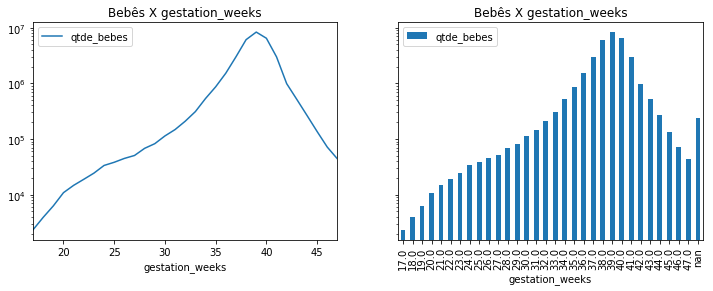

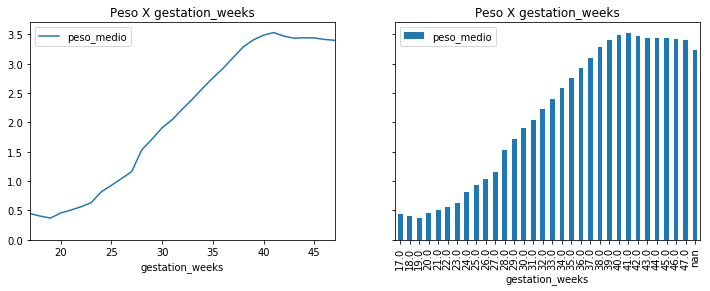

,0,1
mother_married,False,True
qtde_bebes,12225150,21046764
peso_medio,3.19231,3.33018


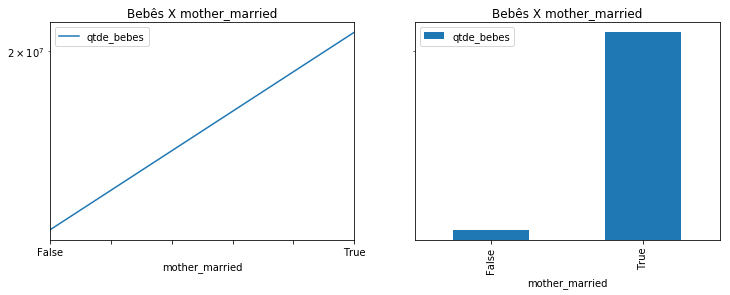

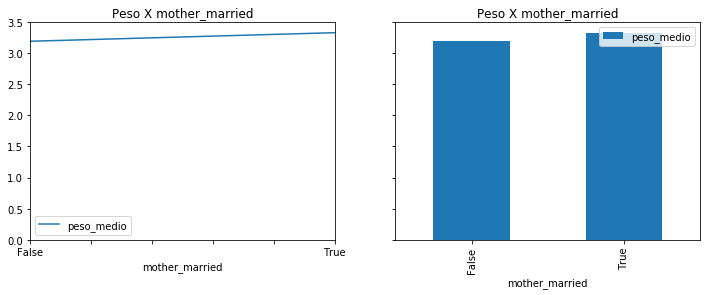

In [0]:
# Bar plot to see gestation_weeks with avg_wt linear and num_babies logarithmic
columns_list = ["is_male", "mother_age", "plurality", "gestation_weeks", "mother_married"]

for column in columns_list:
  df = get_grouped_values(column)
  df = df.sort_values(column)
  display(df.transpose())
  fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12,4) )
  df.plot(x=str(column), y='qtde_bebes', ax=ax1, logy=True, title="Bebês X {0}".format(str(column)));
  df.plot(x=str(column), y='qtde_bebes', ax=ax2, logy=True, kind='bar', title="Bebês X {0}".format(str(column)));
  plt.show()

  fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12,4) )
  df.plot(x=str(column), y='peso_medio', ax=ax1, title="Peso X {0}".format(str(column)));
  df.plot(x=str(column), y='peso_medio', ax=ax2, kind='bar', title="Peso X {0}".format(str(column)));
  plt.show()

In [0]:
# Bar plot to see gestation_weeks with avg_wt linear and num_babies logarithmic
df = get_grouped_values('gestation_weeks')
df = df.sort_values('gestation_weeks')
display(df.transpose())
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12,4) )
df.plot(x='gestation_weeks', y='qtde_bebes', ax=ax1, logy=True, title="Bebês X Sem. Gestação");
df.plot(x='gestation_weeks', y='qtde_bebes', ax=ax2, logy=True, kind='bar', title="Bebês X Sem. Gestação");
plt.show()

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12,4) )
df.plot(x='gestation_weeks', y='peso_medio', ax=ax1, title="Peso X Sem. Gestação");
df.plot(x='gestation_weeks', y='peso_medio', ax=ax2, kind='bar', title="Peso X Sem. Gestação");
plt.show()

# Conclusão

Informe aqui as hipóteses obtidas com base na EDA:

(Escreva sua conclusão aqui!)

 



No próximo notebook, desenvolveremos um modelo de aprendizado de máquina para combinar todos esses fatores para obter uma previsão do peso de um bebê.